In [3]:

! head -2 train.csv

ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
3,1,1.33573941541,8.72747443554,C,3.9210257481,7.91526571423,2.59927780824,3.17689497363,0.012941465862,9.99999947099,0.503281467753,16.4341080862,6.08571076128,2.86682950383,11.6363868896,1.35501321371,8.57142854392,3.67035019539,0.106720429743,0.14888314104,18.8692829411,7.73092330797,XDX,-0.0000000171613069776,C,0.139411580932,1.72081822724,3.3935027632,0.590121939566,8.88086701416,C,A,1.08303338528,1.01082941196,7.2701466347,8.37545196

In [4]:
! head -2 test.csv

ID,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,1.37546545777,11.3611411955,C,4.20077836229,6.57699992701,2.08178403572,1.78438612059,0.0110939889249,9.52381042803,1.31291076027,16.8518525826,6.96117328039,3.1074616797,12.2301365319,1.77305001436,2.85714188575,3.49381641471,0.0968257183607,0.225481311556,17.9102266419,7.43780605231,AFPB,0.000000955831036164,E,0.0691803172368,0.954151665569,4.38661648006,0.573017402564,6.98884753911,,A,1.1152417089,2.08178444885,5.22850306563,8.17843847006,12

In [5]:
! ls

Untitled.ipynb        test.csv
sample_submission.csv train.csv


In [10]:
! head -3 sample_submission.csv

ID,PredictedProb
0,0.5
1,0.5


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')
df.head(5)

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [3]:
df.describe()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114321.000000,114321.000000,6.448900e+04,6.452500e+04,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,...,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
mean,114228.928228,0.761199,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,...,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,65934.487362,0.426353,1.082813e+00,2.961676e+00,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,...,1.356294e+00,1.795978e+00,2.604704,2.099407e+00,5.031683e-01,1.625988e+00,1.074232e+00,0.693262,1.264497e+00,1.134702e+00
min,3.000000,0.000000,-9.996497e-07,-9.817614e-07,-6.475929e-07,-5.287068e-07,-9.055091e-07,-9.468765e-07,-7.783778e-07,-9.828757e-07,...,-9.820642e-07,-9.978497e-07,0.019139,-9.994953e-07,-9.564174e-07,-9.223798e-07,8.197812e-07,0.000000,-9.901257e-07,-9.999134e-07
25%,57280.000000,1.000000,9.135798e-01,5.316428e+00,3.487398e+00,7.605918e+00,2.065064e+00,2.101477e+00,8.658986e-02,7.853659e+00,...,1.786965e+00,5.647712e+00,1.963315,2.053777e-02,1.417600e+00,2.101900e+00,1.393830e+00,0.000000,1.106172e+00,1.012658e+00
50%,114189.000000,1.000000,1.469550e+00,7.023803e+00,4.205991e+00,8.670867e+00,2.412790e+00,2.452166e+00,3.860317e-01,9.059582e+00,...,2.436195e+00,6.749117e+00,2.739239,1.398639e-01,1.614802e+00,2.963620e+00,1.798436e+00,0.000000,1.560138e+00,1.589403e+00
75%,171206.000000,1.000000,2.136128e+00,9.465497e+00,4.833250e+00,9.771353e+00,2.775285e+00,2.834285e+00,1.625246e+00,1.023256e+01,...,3.379175e+00,7.911392e+00,4.075361,8.718333e-01,1.843886e+00,4.108146e+00,2.390158e+00,0.000000,2.332425e+00,2.261905e+00
max,228713.000000,1.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,2.000000e+01,19.686069,2.000000e+01,1.563161e+01,2.000000e+01,2.000000e+01,11.000000,2.000000e+01,2.000000e+01


In [4]:
df.dtypes.value_counts()

float64    108
object      19
int64        6
dtype: int64

In [5]:
df[(df.dtypes[df.dtypes=='object']).index.tolist()].head(5)

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,C,XDX,C,C,A,C,G,DI,C,F,B,D,E,A,E,B,O,NaN,AU
1,C,GUV,C,C,A,E,G,DY,A,F,B,D,D,B,B,A,U,G,AF
2,C,FQ,E,NaN,A,C,F,AS,A,B,B,B,E,G,C,B,S,NaN,AE
3,C,ACUE,D,C,B,C,H,BW,A,F,B,D,B,B,B,B,J,NaN,CJ
4,C,HIT,E,NaN,A,I,H,NaN,C,F,B,D,C,G,C,A,T,G,Z


In [6]:
obj_list=(df.dtypes[df.dtypes=='object']).index.tolist()
total=0
for obj in obj_list:
    total=total+np.array(df[obj].nunique())
    print obj,df[obj].nunique()
print total

v3 3
v22 18210
v24 5
v30 7
v31 3
v47 10
v52 12
v56 122
v66 3
v71 9
v74 3
v75 4
v79 18
v91 7
v107 7
v110 3
v112 22
v113 36
v125 90
18574


In [7]:
num_list=[]

for col in df.columns.values[2:]:
    if col not in obj_list:
        num_list.append(col)
np.array(num_list).shape


(112,)

In [8]:
df.target.value_counts()

1    87021
0    27300
Name: target, dtype: int64

In [9]:
df_test=pd.read_csv('test.csv')


In [10]:
s1=df.target.value_counts(normalize='True')
print s1

1    0.761199
0    0.238801
Name: target, dtype: float64


In [11]:
array_sub=[]
for one_id in df_test['ID'].values:
    array_sub.append([one_id,s1.loc[1]])
data_submission=pd.DataFrame(array_sub, columns=['ID','PredictedProb'])
data_submission.head(4)

,ID,PredictedProb
0,0,0.761199
1,1,0.761199
2,2,0.761199
3,7,0.761199


In [55]:
data_submission.to_csv('model0.csv',index=False)
# first submission

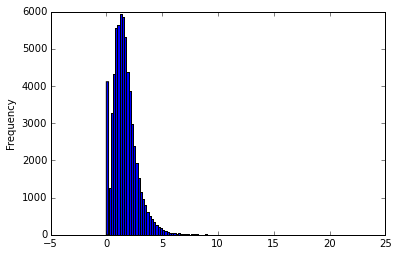

In [12]:
df.v1.plot.hist(bins=100)

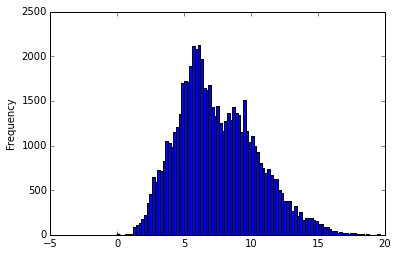

In [66]:
df.v2.plot.hist(bins=100)

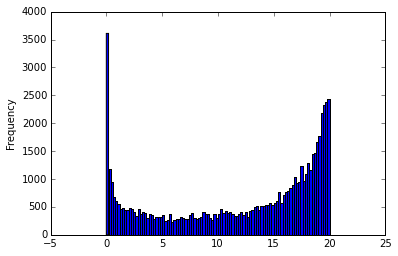

In [67]:
df.v100.plot.hist(bins=100)

In [13]:
int_list=df.dtypes[df.dtypes=='int64'].index.values
int_list

array(['ID', 'target', 'v38', 'v62', 'v72', 'v129'], dtype=object)

In [14]:
int_list=int_list[2:]


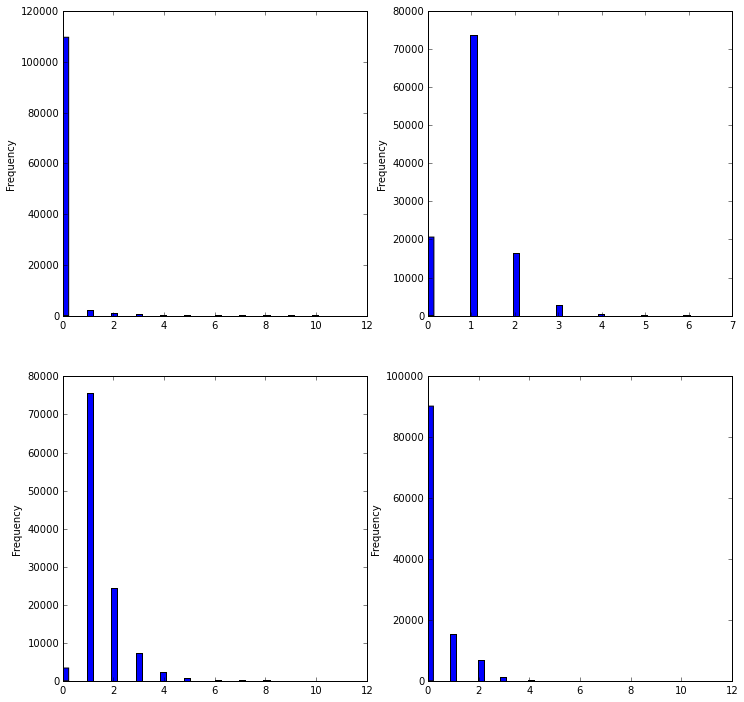

In [15]:
fig=plt.figure(figsize=(12,12))
ax=[]
for i in range(4):
    ax.append(fig.add_subplot(2,2,i+1))
    df[int_list[i]].plot.hist(ax=ax[i],bins=50)

In [16]:
df_test.isnull().sum()
df.isnull().sum()
# both train and test data has lots missing values, can not ingoreb

ID            0
target        0
v1        49832
v2        49796
v3         3457
v4        49796
v5        48624
v6        49832
v7        49832
v8        48619
v9        49851
v10          84
v11       49836
v12          86
v13       49832
v14           4
v15       49836
v16       49895
v17       49796
v18       49832
v19       49843
v20       49840
v21         611
v22         500
v23       50675
v24           0
v25       48619
v26       49832
v27       49832
v28       49832
          ...  
v102      51316
v103      49832
v104      49832
v105      48658
v106      49796
v107          3
v108      48624
v109      48624
v110          0
v111      49832
v112        382
v113      55304
v114         30
v115      49895
v116      49836
v117      48624
v118      49843
v119      50680
v120      49836
v121      49840
v122      49851
v123      50678
v124      48619
v125         77
v126      49832
v127      49832
v128      48624
v129          0
v130      49843
v131      49895
dtype: int64

In [17]:
df1=df.copy()
df1[obj_list]=df1[obj_list].fillna(value='MISS_V')

In [18]:
df1[obj_list].isnull().sum()
# every object variables has no missing value 

v3      0
v22     0
v24     0
v30     0
v31     0
v47     0
v52     0
v56     0
v66     0
v71     0
v74     0
v75     0
v79     0
v91     0
v107    0
v110    0
v112    0
v113    0
v125    0
dtype: int64

In [19]:
for obj in obj_list:
    print obj, df1[obj].nunique()

v3 4
v22 18211
v24 5
v30 8
v31 4
v47 10
v52 13
v56 123
v66 3
v71 9
v74 3
v75 4
v79 18
v91 8
v107 8
v110 3
v112 23
v113 37
v125 91


In [11]:
feature_obj=pd.get_dummies(df1[obj_list[4:]],prefix=obj_list[4:])

In [12]:
feature_obj.head(3)

,v31_A,v31_B,v31_C,v31_MISS_V,v47_A,v47_B,v47_C,v47_D,v47_E,v47_F,...,v125_Q,v125_R,v125_S,v125_T,v125_U,v125_V,v125_W,v125_X,v125_Y,v125_Z
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#use sklearn version
from sklearn import preprocessing


In [21]:
pp_lb_list=[]
obj_array_list=[]
for obj in obj_list:
    pp_lb_list.append(preprocessing.LabelBinarizer(sparse_output=True))
    obj_array_list.append(pp_lb_list[-1].fit_transform(df1[obj].values))


In [22]:
from scipy import sparse

In [23]:
data_obj=sparse.hstack(obj_array_list)
data_obj.shape

(114321, 18585)

In [24]:
pp_imputate=preprocessing.Imputer(strategy='median',axis=1 )
data_num=pp_imputate.fit_transform(df1[num_list])

In [25]:
print np.isnan(data_num).sum()
print data_num.shape

0
(114321, 112)


In [26]:
data_total=sparse.hstack([data_obj,sparse.csr_matrix(data_num)])

In [27]:
data_total.shape

(114321, 18697)

In [28]:
data_y=df1['target'].values

In [29]:
from sklearn import linear_model

In [30]:
lm_lr=linear_model.LogisticRegressionCV()
lm_lr.fit(data_num,data_y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [31]:
lm_lr.scores_[1].mean(axis=1)


array([ 0.76135093,  0.76190201,  0.76198861])

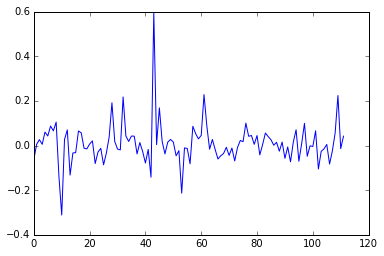

In [32]:
plt.plot(lm_lr.coef_[0])
#some variable positive effect the prob some negative the prob

In [33]:
#try this model as model1, use test data to get the out put
df_test1=df_test.copy()
pp_imputate=preprocessing.Imputer(strategy='median',axis=1)
test_data_num=pp_imputate.transform(df_test1[num_list].values)

In [34]:
test_data_pred=lm_lr.predict_proba(test_data_num)

In [35]:
result=test_data_pred[:,1]

In [36]:
x=df_test1.ID.values

In [55]:
# ready to submit the work
pd.DataFrame({'ID':x,'PredictedProb':result}).to_csv('model1_1.csv',index=False)

In [52]:
#use SGD model more quick,and this time not only use num data,also use objective data
lm_sgd=linear_model.SGDClassifier(n_jobs=-1,loss='log')
lm_sgd.fit(data_total,data_y)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=-1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [42]:
print data_num.shape
print data_obj.shape
print data_total.shape

(114321, 112)
(114321, 18585)
(114321, 18697)


In [43]:
df_test1[obj_list]=df_test[obj_list].fillna(value='MISS_V')

In [45]:
obj_list_array=[]
i=0
for one_col in obj_list:
    obj_list_array.append(pp_lb_list[i].transform(df_test1[one_col].values))
    i+=1

In [46]:
test_data_obj=sparse.hstack(obj_list_array)

In [47]:
test_data_tot=sparse.hstack([sparse.csr_matrix(test_data_num),test_data_obj])

In [48]:
test_data_tot.shape

(114393, 18697)

In [53]:
test_data_pred=lm_sgd.predict_proba(test_data_tot)

In [54]:
result=test_data_pred[:,1]

In [55]:
x=df_test1.ID.values


In [68]:
#ready to submit but bad result because logloss 
pd.DataFrame({'ID':x,'PredictedProb':result}).to_csv('model1_2.csv',index=False)

In [58]:
from sklearn import cross_validation,grid_search
lm_sgd=linear_model.SGDClassifier(n_jobs=-1,loss='log')

In [59]:
gs=grid_search.GridSearchCV(lm_sgd,param_grid={'alpha':np.logspace(-6,3,num=16)})

In [60]:
gs.fit(data_total,data_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=-1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-06,   3.98107e-06,   1.58489e-05,   6.30957e-05,
         2.51189e-04,   1.00000e-03,   3.98107e-03,   1.58489e-02,
         6.30957e-02,   2.51189e-01,   1.00000e+00,   3.98107e+00,
         1.58489e+01,   6.30957e+01,   2.51189e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [61]:
gs.best_params_

{'alpha': 0.0039810717055349691}

In [62]:
test_data_pred=gs.predict_log_proba(test_data_tot)

In [63]:
test_data_pred

array([[-0.62229463, -0.76940524],
       [-0.58995017, -0.8082324 ],
       [-0.9751487 , -0.47342752],
       ..., 
       [-0.54973876, -0.86062084],
       [-0.47296565, -0.97591196],
       [-0.71566528, -0.671125  ]])

In [69]:
result=test_data_pred[:,1]
x=df_test1.ID.values
pd.DataFrame({'ID':x,'PredictedProb':result}).to_csv('model1_3.csv',index=False)
#error submit why?

In [70]:
result_model1_1=pd.read_csv('model1_1.csv')
result_model1_2=pd.read_csv('model1_2.csv')
result_model1_3=pd.read_csv('model1_3.csv')

In [71]:
result_model1_1.head()
# nice result

,ID,PredictedProb
0,0,0.557073
1,1,0.941629
2,2,0.676097
3,7,0.611358
4,10,0.749695


In [72]:
result_model1_2.head()
#bad outpt negative prob, this is bscause the default submission is logloss, how to change sgd parameter to fix this problem?

,ID,PredictedProb
0,0,-0.769405
1,1,-0.808232
2,2,-0.473428
3,7,-0.805478
4,10,-0.841365


In [73]:
result_model1_3.head()

,ID,PredictedProb
0,0,-0.769405
1,1,-0.808232
2,2,-0.473428
3,7,-0.805478
4,10,-0.841365


In [76]:
from sklearn import ensemble, metrics

In [77]:
es_rf=ensemble.RandomForestClassifier(n_estimators=100,n_jobs=-1,criterion='entropy')

In [ ]:
cross_validation.cross_val_score(es_rf,data_num,data_y,scoring='log_loss')
#use different estimator to check the score after cv,run slow,so just use data_num to check, too slow can not run in my labtop

In [ ]:
cross_validation.cross_val_score(linear_model.LogisticRegression(),data_num,data_y,scoring='log_loss')
#also slow